# TP4 -  Forêt d’arbres aléatoires

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def visualize_classifier(model, X, y):
    ax = plt.gca()
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap='rainbow',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    #ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Create a color plot with the results

    n_classes = len(np.unique(y))
    plt.scatter(xx.ravel(), yy.ravel(), c=Z, s=0.1, cmap='rainbow');
    ax.set(xlim=xlim, ylim=ylim)
    plt.show()

## I. Chargement et visualisation des données

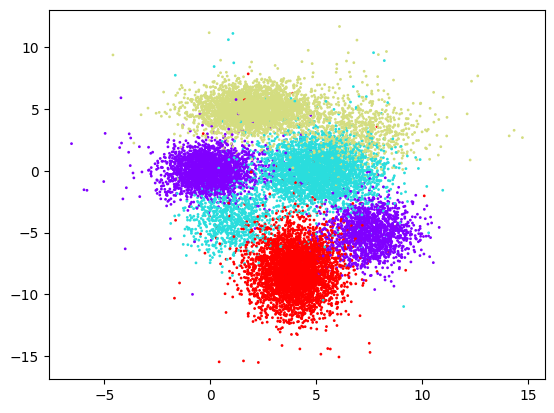

In [3]:
data = np.load("TP4.npz") 
X_train, y_train, X_test, y_test = (data[key] for key in ["X_train", "y_train", "X_test", "y_test"]) 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=1, cmap='rainbow'); 
plt.show()

Questions \
Combien  y a-t-il de points dans la base d’apprentissage ? Dans la base de test ? Quelle est la 
dimension des données ?

In [4]:
print(f"Il y a {X_train.shape[0]} points dans la base d'apprentissage")
print(f"Il y a {X_test.shape[0]} points dans la base de tests")
print(f"Les données sont en {X_train.shape[1]} dimentions.")

Il y a 16640 points dans la base d'apprentissage
Il y a 4160 points dans la base de tests
Les données sont en 2 dimentions.


## II. Arbre de décision

### a. Principe des arbres de décision

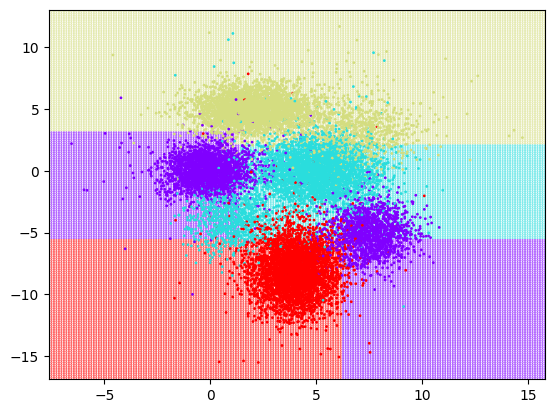

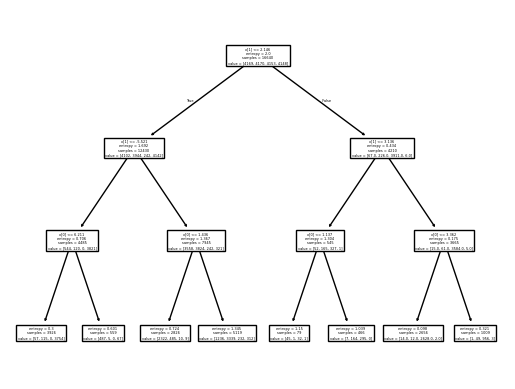

|--- feature_1 <= 2.15
|   |--- feature_1 <= -5.52
|   |   |--- feature_0 <= 6.21
|   |   |   |--- class: 4.0
|   |   |--- feature_0 >  6.21
|   |   |   |--- class: 1.0
|   |--- feature_1 >  -5.52
|   |   |--- feature_0 <= 1.44
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  1.44
|   |   |   |--- class: 2.0
|--- feature_1 >  2.15
|   |--- feature_1 <= 3.14
|   |   |--- feature_0 <= 1.14
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  1.14
|   |   |   |--- class: 3.0
|   |--- feature_1 >  3.14
|   |   |--- feature_0 <= 3.36
|   |   |   |--- class: 3.0
|   |   |--- feature_0 >  3.36
|   |   |   |--- class: 3.0



In [5]:
tree1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state= 425) 
tree1.fit(X_train, y_train) 
visualize_classifier(tree1, X_train, y_train) 
 
tree.plot_tree(tree1) 
plt.show() 
text_representation = tree.export_text(tree1) 
print(text_representation)

Questions \
Que représente la variable max_depth ?  \
Qu’observe-t-on avec visualize_classifier,  tree.plot_tree et tree.export_text ? \
Retrouvez-vous visuellement toutes les découpes sur la figure issue de visualize_classifier?

Reponses\
max_depth : La profondeur maximale de l'arbre, ici 4, soit au maximum 4 noeuds (le dernier étent une feuille).\
visualize_classifier : représente les données et les découpes du classifieur (prédictions du classifieur)\
tree.plot_tree : l'arbre de décision
tree.export_text : de même mais sous forme textuelle
On retrouve bien tous les découpages, certains sont cependant petits

### b. Performance d’un classifieur muti-classes

In [6]:
y_pred = tree1.predict(X_test) 
C=confusion_matrix(y_test, y_pred) 
print(classification_report(y_test, y_pred)) 
print('Accuracy= ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.83      0.66      0.73      1031
         2.0       0.64      0.79      0.71      1030
         3.0       0.93      0.94      0.94      1047
         4.0       0.96      0.91      0.93      1052

    accuracy                           0.83      4160
   macro avg       0.84      0.83      0.83      4160
weighted avg       0.84      0.83      0.83      4160

Accuracy=  0.8264423076923076


Questions \
Que représentent les valeurs renvoyées par classification_report ?  \
Retrouvez par le calcul la première ligne (classe 1) renvoyée par classification_report à partir 
de la matrice de confusion.

Reponses\
classification_report : construit un rapport textuel des principales mesures de classification.
Les valeurs 1.0,...,4.0 à gauche sont les noms des classes

In [7]:
print("confusion matrix\n",C)
TP = C[0,0] ; FP = np.sum(C[1:,0]) ; FN = np.sum(C[0,1:])
precision = TP / (TP + FP)
rappel = TP / (TP + FN)
print("précision = ",precision)
print("rappel = ", rappel)
print("f1_score", 2*(precision * rappel) /(precision + rappel))
print("support =",TP + FN)

confusion matrix
 [[678 334   8  11]
 [122 814  63  31]
 [  6  55 986   0]
 [ 15  76   1 960]]
précision =  0.8258221680876979
rappel =  0.6576139670223085
f1_score 0.7321814254859611
support = 1031


### c. Optimisation de la profondeur de l’arbre

max accuracy = 0.93 with depth = 8 


Text(0.5, 1.0, 'accuracy en fonction de la profondeur')

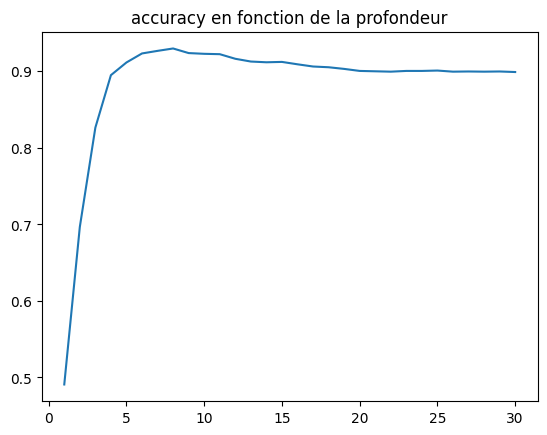

In [8]:
max_depth = 30
accuracies = np.empty(max_depth+1)
for depth in range(1,max_depth+1):
    tree1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = depth, random_state= 425) 
    tree1.fit(X_train, y_train) 
    #visualize_classifier(tree1, X_train, y_train) 
    #text_representation = tree.export_text(tree1) 
    #print(text_representation)

    y_pred = tree1.predict(X_test) 
    C=confusion_matrix(y_test, y_pred) 
    accuracies[depth] = accuracy_score(y_test, y_pred)

plt.plot(range(1,max_depth+1),accuracies[1:])
depth_max_acc = np.argmax(accuracies)
print(f'max accuracy = {accuracies[depth_max_acc]:.2f} with depth = {depth_max_acc} ')
plt.title("accuracy en fonction de la profondeur")

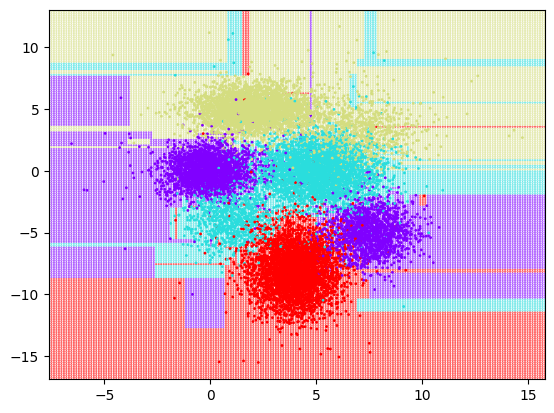

              precision    recall  f1-score   support

         1.0       0.90      0.90      0.90      1031
         2.0       0.84      0.83      0.84      1030
         3.0       0.92      0.92      0.92      1047
         4.0       0.93      0.95      0.94      1052

    accuracy                           0.90      4160
   macro avg       0.90      0.90      0.90      4160
weighted avg       0.90      0.90      0.90      4160



In [9]:
tree1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = depth, random_state= 425) 
tree1.fit(X_train, y_train) 
visualize_classifier(tree1, X_train, y_train) 
#visualize_classifier(tree1, X_test, y_test) 
# text_representation = tree.export_text(tree1) 
# print(text_representation)
print(classification_report(y_test, y_pred)) 

Questions \
Est-ce que ce partitionnement vous paraît visuellement satisfaisant ? Commentez.

Ce partitionement à l'air un peu sur-apprentit, on a choisit une profondeur tel que la base de test ait la meilleur accuracy.

### d. Arbre de décision sur des données de grande dimension

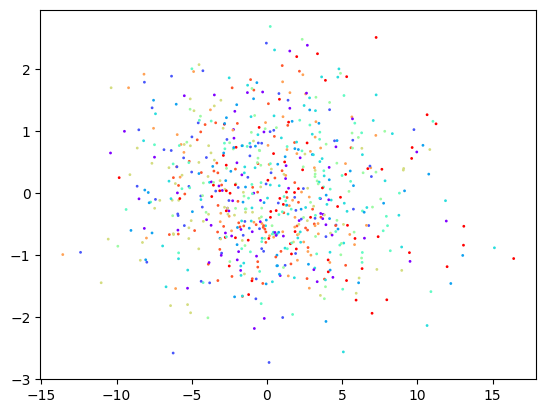

In [10]:
data = np.load("TP4b.npz") 
X_train, y_train, X_test, y_test = (data[key] for key in ["X_train", "y_train", "X_test", "y_test"]) 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=1, cmap='rainbow'); 
plt.show()

Questions \
Combien  y a-t-il de points dans la base d’apprentissage ? Dans la base de test ? Quelle est la 
dimension des données ? \
Quel est le taux de classification obtenu avec le meilleur classifieur ?

In [11]:
print(f"Il y a {X_train.shape[0]} points dans la base d'apprentissage")
print(f"Il y a {X_test.shape[0]} points dans la base de tests")
print(f"Les données sont en {X_train.shape[1]} dimentions.")

Il y a 700 points dans la base d'apprentissage
Il y a 300 points dans la base de tests
Les données sont en 100 dimentions.


In [12]:
max_depth = 30
accuracies = np.empty(max_depth+1)
for depth in range(1,max_depth+1):
    tree1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = depth, random_state= 425) 
    tree1.fit(X_train, y_train) 

    y_pred = tree1.predict(X_test) 
    C=confusion_matrix(y_test, y_pred) 
    accuracies[depth] = accuracy_score(y_test, y_pred)

depth_max_acc = np.argmax(accuracies)
print(f'max accuracy = {accuracies[depth_max_acc]:.2f} with depth = {depth_max_acc} ')


max accuracy = 0.31 with depth = 7 


Mauvaise accuracy car trop de dimentions (100) et 10 classes.

## III. Forêt d’arbres aléatoires

### a. Test d’une forêt d’arbres aléatoires

In [13]:
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=425) 

In [14]:
#base de données 1
data = np.load("TP4.npz") 
X_train, y_train, X_test, y_test = (data[key] for key in ["X_train", "y_train", "X_test", "y_test"]) 

RF.fit(X_train, y_train.ravel())
y_pred = RF.predict(X_test) 
C=confusion_matrix(y_test, y_pred) 
print('Accuracy= ',accuracy_score(y_test, y_pred))


Accuracy=  0.9266826923076923


In [15]:
#base de données 2
data = np.load("TP4b.npz") 
X_train, y_train, X_test, y_test = (data[key] for key in ["X_train", "y_train", "X_test", "y_test"]) 

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test) 
C=confusion_matrix(y_test, y_pred) 
print(f'Accuracy= {accuracy_score(y_test, y_pred):.2f}')


Accuracy= 0.26


L'accuracy est équivalente, un peu moins bonne, mais on a pas eu besoin d'ajuster la depth à la meilleur accuracy pour cette base de test

### b. Influence des paramètres 

In [17]:
import time

max accuracy = 0.50 with nb_trees = 300 


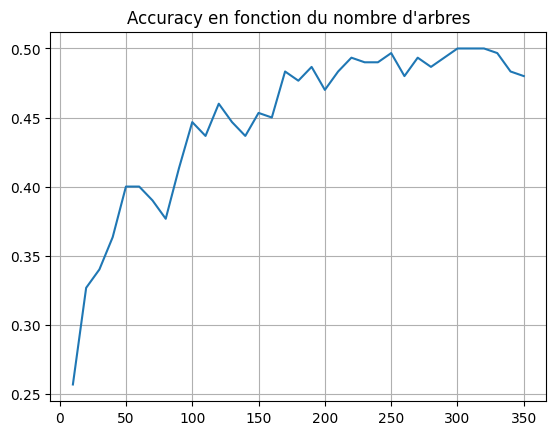

accuracy (for min time/accuracy) = 0.33
with nb_trees = 20


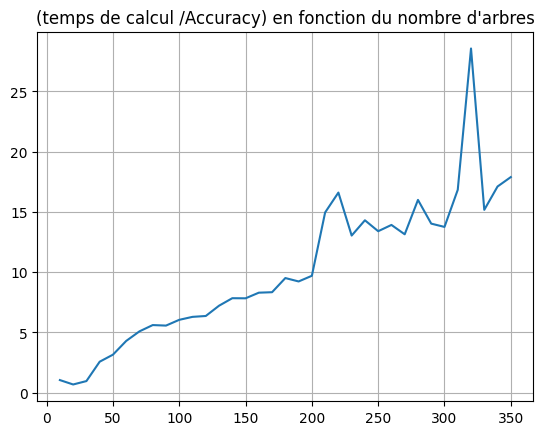

In [52]:
# évolution  du  taux  de  bonne  classification  en  fonction  du  nombre  d’arbres
max_nb_tree10 = 35  #max nb_tree = max_nb_tree10 * 10
accuracies = np.empty(max_nb_tree10+1); accuracies[0] = 0
tps = []; tps.append(time.time()); dtime=[]
for nb_tree10 in range(1,max_nb_tree10+1):  #nb_tree = nb_tree*10
    RF = RandomForestClassifier(criterion='entropy', n_estimators=nb_tree10*10, random_state=425, n_jobs=-1) 
    RF.fit(X_train, y_train.ravel())
    y_pred = RF.predict(X_test) 
    C=confusion_matrix(y_test, y_pred) 
    accuracies[nb_tree10] = accuracy_score(y_test, y_pred)
    tps.append(time.time())
    dtime.append(tps[nb_tree10] - tps[nb_tree10-1])

plt.title("Accuracy en fonction du nombre d'arbres")
plt.plot(range(10,10*(max_nb_tree10)+1,10),accuracies[1:])
index_nbtrees_max_acc = np.argmax(accuracies)
print(f'max accuracy = {accuracies[index_nbtrees_max_acc]:.2f} with nb_trees = {index_nbtrees_max_acc*10} ')
plt.grid()
plt.show()

# compromis temps/Taux
plt.title("(temps de calcul /Accuracy) en fonction du nombre d'arbres")
ratio = np.array(dtime)/np.array(accuracies[1:])
plt.grid()
plt.plot(range(10,10*(max_nb_tree10)+1,10),ratio)
index_nbtrees_min_ratio = np.argmin(ratio)
print(f'accuracy (for min time/accuracy) = {accuracies[index_nbtrees_min_ratio+1]:.2f}')
print(f"with nb_trees = {(index_nbtrees_min_ratio+1)*10}")

Le ratio temp/taux semble augmenter grossièrement linéairement avec le nombre d'arbres.\
Le maximum d'accuraty semble atteint pour 300 arbres, mais le taux obtenu est similaire pour 250 arbres, avec un temp de calcul un peu plus faible.

In [51]:
nb_arbres = 250
print(f'accuracy pour {nb_arbres} arbres = {accuracies[nb_arbres//10 -1]:.2f}, \
temps de calcul = {dtime[nb_arbres//10 -1]:.2f} s')

accuracy pour 250 arbres = 0.49, temps de calcul = 8.76 s


max accuracy = 0.50 avec profondeur max = 15 


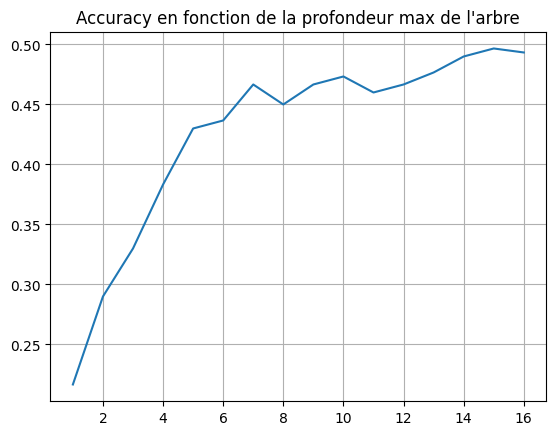

In [63]:
# évolution  du  taux  de  bonne classification en fonction de la profondeur de l’arbre

max_depth = 16
accuracies = np.empty(max_depth+1); accuracies[0] = 0
for depth in range(1,max_depth+1):
    RF = RandomForestClassifier(criterion='entropy', n_estimators=nb_arbres, random_state=425, max_depth=depth, n_jobs= -1) 
    RF.fit(X_train, y_train.ravel())
    y_pred = RF.predict(X_test) 
    C=confusion_matrix(y_test, y_pred) 
    accuracies[depth] = accuracy_score(y_test, y_pred)

plt.title("Accuracy en fonction de la profondeur max de l'arbre")
plt.plot(range(1,max_depth+1),accuracies[1:])
index_depth_max_acc = np.argmax(accuracies)
print(f'max accuracy = {accuracies[index_depth_max_acc]:.2f} avec profondeur max = {index_depth_max_acc} ')
plt.grid()
plt.show()

L'accuracy ne monte plus beaucoup à partir de 7 de profondeur

In [ ]:
depth = 7
print(f'accuracy pour profondeur {depth} = {accuracies[depth]:.2f}')

accuracy pour profondeur 7 = 0.47


max accuracy = 0.50 avec nb_features max = 34 


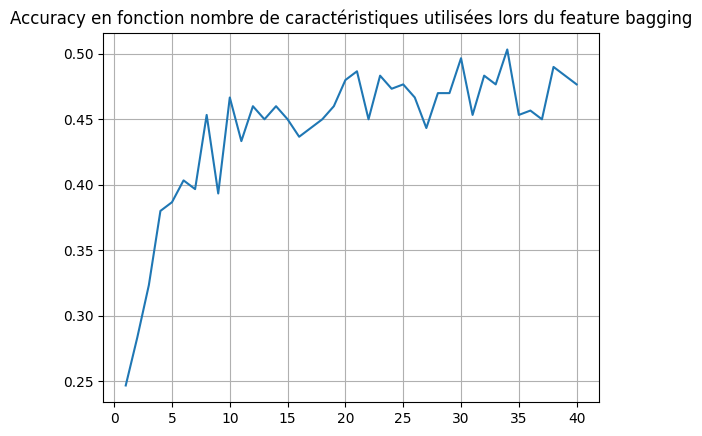

In [ ]:
# évolution du taux de bonne classification en fonction du nombre de caractéristiques utilisées lors du bagging

max_nfeatures = 25
accuracies = np.empty(max_nfeatures+1); accuracies[0] = 0
for nfeatures in range(1,max_nfeatures+1):
    RF = RandomForestClassifier(criterion='entropy', n_estimators=nb_arbres, \
                                random_state=425, max_depth=depth,max_features= nfeatures, n_jobs= -1) 
    RF.fit(X_train, y_train.ravel())
    y_pred = RF.predict(X_test) 
    C=confusion_matrix(y_test, y_pred) 
    accuracies[nfeatures] = accuracy_score(y_test, y_pred)

plt.title("Accuracy en fonction nombre de caractéristiques utilisées lors du feature bagging")
plt.plot(range(1,max_nfeatures+1),accuracies[1:])
index_nfeatures_max_acc = np.argmax(accuracies)
print(f'max accuracy = {accuracies[index_nfeatures_max_acc]:.2f} avec nb_features max = {index_nfeatures_max_acc} ')
plt.grid()
plt.show()

Les résultats ne s'améliorent pas beaucoup au-dessus de 10

In [73]:
nfeatures = 10
print(f'accuracy pour {nfeatures} caractéristiques au feature bagging = {accuracies[nfeatures]:.2f}')

accuracy pour 10 caractéristiques au feature bagging = 0.47


### c. Choix des paramètres optimaux 

In [74]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(criterion='entropy',random_state=425, n_jobs= -1) 

#paramètres à tester
param_grid = {
    'n_estimators': [230,250,270],      # nombre d’arbres
    'max_depth': [6, 7, 10],      # profondeur max
    'max_features': [8, 10, 12]    # nombre de features testées à chaque split
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,               # validation croisée à 5 plis
    scoring='accuracy', # critère d’évaluation
    n_jobs=-1,          # utilise tous les cœurs CPU
    verbose=2           # affiche la progression
)

grid_search.fit(X_train, y_train)


print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure accuracy moyenne (CV) :", grid_search.best_score_)

# accuracy sur X_test
best_model = grid_search.best_estimator_
print("Accuracy sur le test :", best_model.score(X_test, y_test))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Meilleurs paramètres : {'max_depth': 6, 'max_features': 10, 'n_estimators': 270}
Meilleure accuracy moyenne (CV) : 0.40857142857142864
Accuracy sur le test : 0.43333333333333335


Questions \
Que représente le paramètre cv de GridSearchCV ?

Le paramètre CV (Cross-Validation) désigne le nombre de sous-ensemble (folds) pour lesquels la base d'entraînement sera divisée. (Les folds sont de taille égale)\
Ici on prend cv=5, d'où la fonction va prendre 4 sous-ensembles au hasard et faire un entrainement dessus, puis faire l'accuracy sur le dernier (utilisé comme test).\
On répète 5 fois de sorte que le fold de test ne soit jamais le même.\
Puis on fait la moyenne des accuracies. Cela permet d'éviter que le résultat dépende d'une séparation train/test particulière.\
On a ainsi une validation dite croisée.